In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.sparse as ssp
import json
import networkx as nx
import json 
import seaborn as sns
from community import community_louvain 
from scipy.stats import gaussian_kde
import pyreadr

import sys
sys.path.append('..')
import network_utils as ne

In [2]:
SAVEFIG = False
TITLEFONT = {'fontname': 'arial', 'size': 14}
LABELFONT = {'fontname': 'arial', 'size': 14}
LEGENDFONT = {'family': 'arial', 'size': 12}
TICKPARAM = {'family': 'arial', 'size': 12}

In [3]:
with pd.HDFStore('../data/gene_network_data.h5') as store:
    tec = store['TEC']
    rna = store['RNA']
np_tec_abs = np.abs(tec.to_numpy(copy=True))

#### Fig 4a: Overall difference between tissue-specific and global TEC

In [4]:
lung_tec = pyreadr.read_r('../data/tissue_TEC/human_lung_TE_rho.rda')
lung_tec = lung_tec['human_TE_rho']
lung_tec = lung_tec.iloc[:-1, :-1] # remove dummy gene

In [5]:
shared_genes = sorted(list(set(lung_tec.index).intersection(set(tec.index))))
lung_tec = lung_tec.loc[shared_genes][shared_genes]
human_tec = tec.loc[shared_genes][shared_genes]

human_tec = human_tec.to_numpy(copy=True)
lung_tec = lung_tec.to_numpy(copy=True)
np_diff = human_tec - lung_tec

# cutoff = 0.5
# mask = np.bitwise_and((-1 * cutoff) < np_diff, np_diff < cutoff)
# np_diff[mask] = 0

row_sums = np_diff.sum(axis=1)
perm = np.argsort(row_sums)
np_diff = np_diff[perm, :][:, perm]

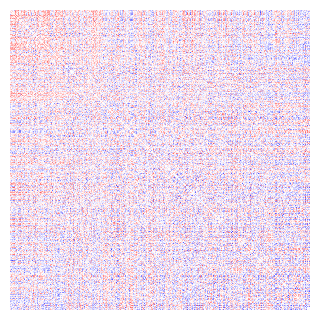

In [6]:
plt.figure(figsize=(3, 3))
hm = sns.heatmap(np_diff, cmap='bwr_r', xticklabels=False, yticklabels=False, cbar=False, center=0)
# Rasterize the main heatmap
hm.collections[0].set_rasterized(True)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./supp_fig/fig5a1.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
plt.show()

In [7]:
brain_tec = pyreadr.read_r('../data/tissue_TEC/human_brain_TE_rho.rda')
brain_tec = brain_tec['human_TE_rho']
brain_tec = brain_tec.iloc[:-1, :-1] # remove dummy gene

In [8]:
shared_genes = sorted(list(set(brain_tec.index).intersection(set(tec.index))))
brain_tec = brain_tec.loc[shared_genes][shared_genes]
human_tec = tec.loc[shared_genes][shared_genes]

human_tec = human_tec.to_numpy(copy=True)
brain_tec = brain_tec.to_numpy(copy=True)
np_diff = human_tec - brain_tec

# cutoff = 0.5
# mask = np.bitwise_and((-1 * cutoff) < np_diff, np_diff < cutoff)
# np_diff[mask] = 0

row_sums = np_diff.sum(axis=1)
perm = np.argsort(row_sums)
np_diff = np_diff[perm, :][:, perm]

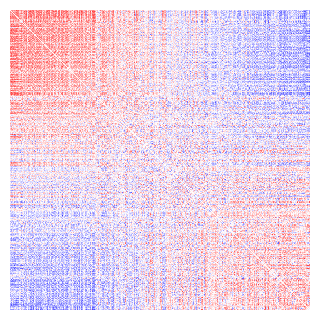

In [9]:
plt.figure(figsize=(3, 3))
hm = sns.heatmap(np_diff, cmap='bwr_r', xticklabels=False, yticklabels=False, cbar=False, center=0)
# Rasterize the main heatmap
hm.collections[0].set_rasterized(True)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./supp_fig/fig5a2.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
plt.show()

#### Fig 5b Degree distribution of tissue-specific networks with cutoff 0.75

In [10]:
lung_tec = pyreadr.read_r('../data/tissue_TEC/human_lung_TE_rho.rda')
lung_tec = lung_tec['human_TE_rho']
lung_tec = lung_tec.iloc[:-1, :-1] # remove dummy gene
np_lung_tec_abs = np.abs(lung_tec.to_numpy(copy=True))

lung_tec_al = ne.threshold_weighted_adjacency_list(np_lung_tec_abs, 0.75)
lung_tec_graph_75 = ne.construct_network(lung_tec_al, "lung_TEC_75", lung_tec.columns)

tec_degree_sequence = sorted((d for n, d in lung_tec_graph_75.degree()), reverse=True)
max_degree = max(tec_degree_sequence)

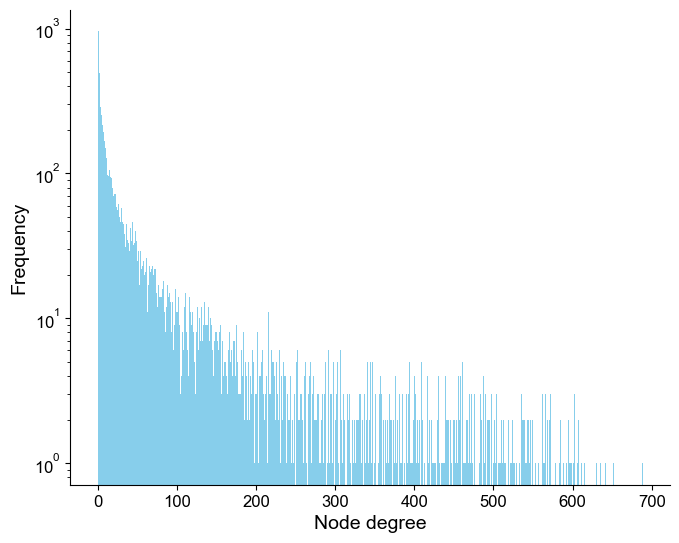

In [11]:
# plot figure
plt.figure(figsize=(6, 4.75))
plt.hist(tec_degree_sequence, bins=range(0, max_degree + 2), color='skyblue', edgecolor='none', align='left')
plt.yscale('log')

# adjust display
plt.xticks(**TICKPARAM)
plt.yticks(**TICKPARAM)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./supp_fig/fig5b1.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
else:
    plt.xlabel('Node degree', **LABELFONT)
    plt.ylabel('Frequency', **LABELFONT)
plt.show()

In [12]:
brain_tec = pyreadr.read_r('../data/tissue_TEC/human_brain_TE_rho.rda')
brain_tec = brain_tec['human_TE_rho']
brain_tec = brain_tec.iloc[:-1, :-1] # remove dummy gene
np_brain_tec_abs = np.abs(brain_tec.to_numpy(copy=True))

brain_tec_al = ne.threshold_weighted_adjacency_list(np_brain_tec_abs, 0.75)
brain_tec_graph_75 = ne.construct_network(brain_tec_al, "brain_TEC_75", brain_tec.columns)

tec_degree_sequence = sorted((d for n, d in brain_tec_graph_75.degree()), reverse=True)
max_degree = max(tec_degree_sequence)

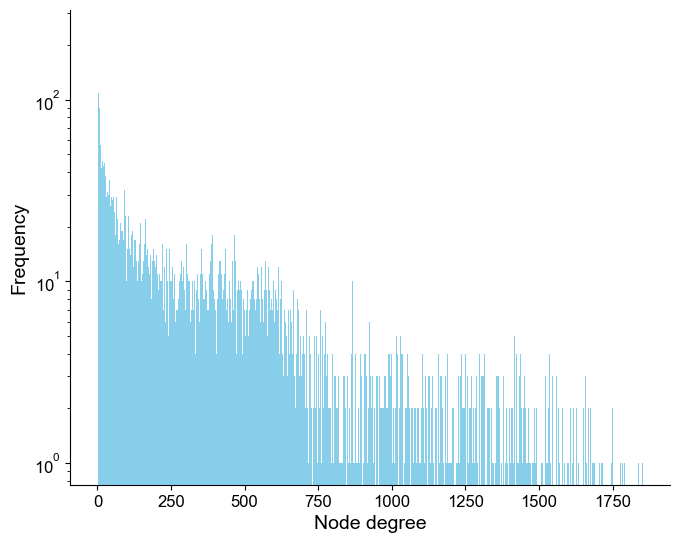

In [13]:
# plot figure
plt.figure(figsize=(6, 4.75))
plt.hist(tec_degree_sequence, bins=range(0, max_degree + 2), color='skyblue', edgecolor='none', align='left')
plt.yscale('log')

# adjust display
plt.xticks(**TICKPARAM)
plt.yticks(**TICKPARAM)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./supp_fig/fig5b2.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
else:
    plt.xlabel('Node degree', **LABELFONT)
    plt.ylabel('Frequency', **LABELFONT)
plt.show()

In [14]:
# Construct network
THRESHOLD = 0.75
tec_al = ne.threshold_weighted_adjacency_list(np_tec_abs, THRESHOLD)  
tec_graph_75 = ne.construct_network(tec_al, "TEC_75", tec.columns)

# generate a mapping between node name and node idx
idx2name = dict()
name2idx = dict()
for node_idx in tec_graph_75.nodes():
    curr_name = tec_graph_75.nodes[node_idx]['name']
    name2idx[curr_name] = node_idx     
    idx2name[node_idx] = curr_name   

In [15]:
lung_tec = pyreadr.read_r('../data/tissue_TEC/human_lung_TE_rho.rda')
lung_tec = lung_tec['human_TE_rho']
lung_tec = lung_tec.iloc[:-1, :-1] # remove dummy gene
np_lung_tec_abs = np.abs(lung_tec.to_numpy(copy=True))

lung_tec_al = ne.threshold_weighted_adjacency_list(np_lung_tec_abs, THRESHOLD)
lung_tec_graph_75 = ne.construct_network(lung_tec_al, "lung_TEC_75", lung_tec.columns)

lung_idx2name = dict()
lung_name2idx = dict()
for node_idx in lung_tec_graph_75.nodes():
    curr_name = lung_tec_graph_75.nodes[node_idx]['name']
    lung_name2idx[curr_name] = node_idx     
    lung_idx2name[node_idx] = curr_name   

In [16]:
rna_spec = pd.read_csv('../data/tissue_specificity/rna_lung.csv')
prot_spec = pd.read_csv('../data/tissue_specificity/protein_lung.csv')
lung_enriched = set(rna_spec['Gene']).intersection(set(prot_spec['Gene name']))
lung_enriched = set(lung_tec.columns).intersection(lung_enriched)

lung_enriched = set(prot_spec['Gene name'])

In [17]:
global_deg = []
lung_deg = []

for gene in lung_enriched:
    if gene in lung_name2idx.keys():
        lung_deg.append(lung_tec_graph_75.degree(lung_name2idx[gene]))
    else:
        lung_deg.append(0)
    
    if gene in name2idx.keys():
        global_deg.append(tec_graph_75.degree(name2idx[gene]))
    else:
        global_deg.append(0)

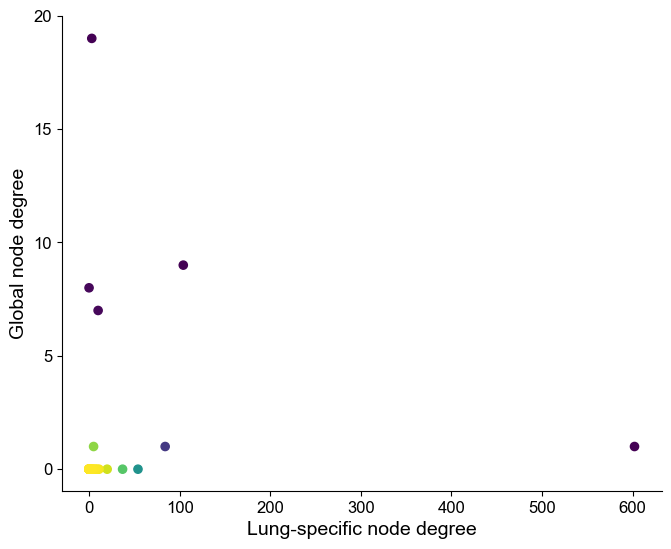

In [18]:
global_deg = np.array(global_deg, dtype=np.float64)
lung_deg = np.array(lung_deg, dtype=np.float64)
stacked_deg = np.vstack([lung_deg, global_deg]) # stack together [(tec_deg, rna_deg)]
est_density = gaussian_kde(stacked_deg)(stacked_deg) # compute density using Gaussian KDE

# Sort points by density for layering
idx = est_density.argsort()
global_deg, lung_deg, est_density = global_deg[idx], lung_deg[idx], est_density[idx]

plt.figure(figsize=(6, 4.75))
plt.scatter(lung_deg, global_deg, c=est_density, cmap='viridis', s=35)
plt.xticks(**TICKPARAM)
y_ticks = [i for i in range(0, 21, 5)]
plt.yticks(y_ticks, y_ticks, **TICKPARAM)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./supp_fig/fig5c1.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
else:
    plt.xlabel('Lung-specific node degree', **LABELFONT)   
    plt.ylabel('Global node degree', **LABELFONT)
plt.show()

In [19]:
brain_tec = pyreadr.read_r('../data/tissue_TEC/human_brain_TE_rho.rda')
brain_tec = brain_tec['human_TE_rho']
brain_tec = brain_tec.iloc[:-1, :-1] # remove dummy gene
np_brain_tec_abs = np.abs(brain_tec.to_numpy(copy=True))

brain_tec_al = ne.threshold_weighted_adjacency_list(np_brain_tec_abs, THRESHOLD)
brain_tec_graph_75 = ne.construct_network(brain_tec_al, "brain_TEC_75", brain_tec.columns)

brain_idx2name = dict()
brain_name2idx = dict()
for node_idx in brain_tec_graph_75.nodes():
    curr_name = brain_tec_graph_75.nodes[node_idx]['name']
    brain_name2idx[curr_name] = node_idx     
    brain_idx2name[node_idx] = curr_name   

In [20]:
rna_spec = pd.read_csv('../data/tissue_specificity/rna_brain.csv')
prot_spec = pd.read_csv('../data/tissue_specificity/protein_brain.csv')
brain_enriched = set(rna_spec['Gene']).intersection(set(prot_spec['Gene name']))
brain_enriched = set(brain_tec.columns).intersection(brain_enriched)

In [21]:
global_deg = []
brain_deg = []

for gene in brain_enriched:
    if gene in brain_name2idx.keys():
        brain_deg.append(brain_tec_graph_75.degree(brain_name2idx[gene]))
    else:
        brain_deg.append(0)
    
    if gene in name2idx.keys():
        global_deg.append(tec_graph_75.degree(name2idx[gene]))
    else:
        global_deg.append(0)

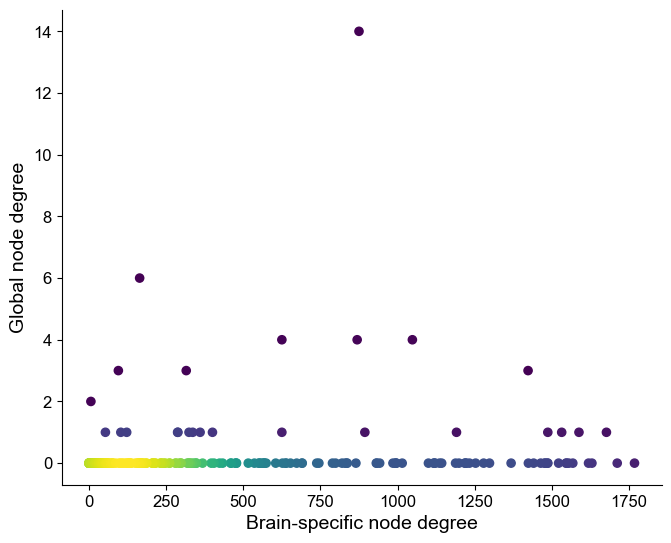

In [22]:
global_deg = np.array(global_deg, dtype=np.float64)
brain_deg = np.array(brain_deg, dtype=np.float64)
stacked_deg = np.vstack([brain_deg, global_deg]) # stack together [(tec_deg, rna_deg)]
est_density = gaussian_kde(stacked_deg)(stacked_deg) # compute density using Gaussian KDE

# Sort points by density for layering
idx = est_density.argsort()
global_deg, brain_deg, est_density = global_deg[idx], brain_deg[idx], est_density[idx]

plt.figure(figsize=(6, 4.75))
plt.scatter(brain_deg, global_deg, c=est_density, cmap='viridis', s=35)
plt.xticks(**TICKPARAM)
plt.yticks(**TICKPARAM)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./supp_fig/fig5c2.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
else:
    plt.xlabel('Brain-specific node degree', **LABELFONT)   
    plt.ylabel('Global node degree', **LABELFONT)
plt.show()